In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


Importing dataset

In [24]:
df=pd.read_csv('Tomato.csv')

Print first 5 rows of dataset

In [25]:
df.head()

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato
2,2013-06-18,Kg,22,26,24.0,Tomato
3,2013-06-19,Kg,24,28,26.0,Tomato
4,2013-06-20,Kg,22,26,24.0,Tomato


Check for null values and print the sum of null values

In [26]:
df.isnull().sum()
df.columns


Index(['Date', 'Unit', 'Minimum', 'Maximum', 'Average', 'Market'], dtype='object')

Check the data type of "Date" column

In [27]:
type(df['Date'][0])

str

COnvert date column to date.time.series

In [28]:
df['Date']=pd.to_datetime(df['Date'])

Check the data type after changing data type

In [29]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

Describe the dataset

In [30]:
df.describe()

,Date,Minimum,Maximum,Average
count,2741,2741.000000,2741.000000,2741.000000
mean,2017-07-06 23:48:26.530463488,35.089748,41.281284,38.185516
min,2013-06-16 00:00:00,8.000000,12.000000,10.000000
25%,2015-08-20 00:00:00,22.000000,30.000000,25.000000
50%,2017-07-11 00:00:00,30.000000,38.000000,35.000000
75%,2019-06-07 00:00:00,45.000000,50.000000,47.500000
max,2021-05-13 00:00:00,115.000000,120.000000,117.500000
std,NaN,16.648425,17.364135,16.970949


Show the information of dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2741 non-null   datetime64[ns]
 1   Unit     2741 non-null   object        
 2   Minimum  2741 non-null   int64         
 3   Maximum  2741 non-null   int64         
 4   Average  2741 non-null   float64       
 5   Market   2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 128.6+ KB


Plot average value of tomatoes over time

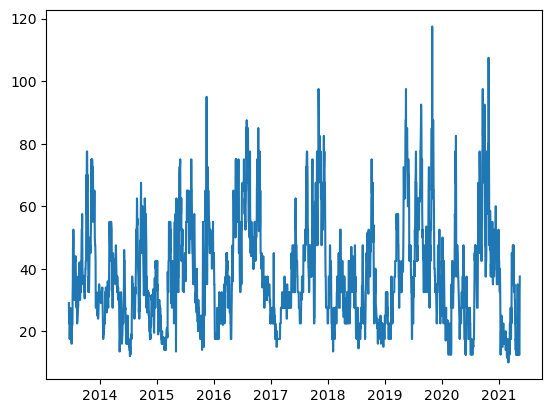

In [32]:
plt.plot(df['Date'],df['Average'])

Create column of 'year'

In [33]:
df['year']=df['Date'].apply(lambda x: x.year)

Create colum of 'month'

In [34]:
df['month']=df['Date'].apply(lambda x: x.month)

Create column of 'day'

In [35]:
df['day']=df['Date'].apply(lambda x: x.day)

Create of 'day of week'

In [36]:
df['day of week']=df['Date'].apply(lambda x: x.dayofweek)

Print first 5 rows of dataset

In [37]:
df.head()

,Date,Unit,Minimum,Maximum,Average,Market,year,month,day,day of week
0,2013-06-16,Kg,26,32,29.0,Tomato,2013,6,16,6
1,2013-06-17,Kg,20,25,22.5,Tomato,2013,6,17,0
2,2013-06-18,Kg,22,26,24.0,Tomato,2013,6,18,1
3,2013-06-19,Kg,24,28,26.0,Tomato,2013,6,19,2
4,2013-06-20,Kg,22,26,24.0,Tomato,2013,6,20,3


Show total type of 'Market'

In [38]:
df['Market'].value_counts()

Market
Tomato    2741
Name: count, dtype: int64

In [39]:
# df_numeric = df.apply(pd.to_numeric, errors='coerce')

# # Drop rows with NaN values
# df_numeric = df_numeric.dropna()

# # Create the heatmap
# sns.heatmap(df_numeric.corr(), annot=True)

In [40]:
# df.drop(df['Unit'])
# sns.heatmap(df.corr(),annot=True)

Create key for day of week 'numeric values' to 'alphabatic names'

In [41]:
cmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

Map the day names using map function

In [42]:
df['day of week']=df['day of week'].map(cmap)

Print first 5 rows of dataset

In [43]:
df.head()

,Date,Unit,Minimum,Maximum,Average,Market,year,month,day,day of week
0,2013-06-16,Kg,26,32,29.0,Tomato,2013,6,16,Sun
1,2013-06-17,Kg,20,25,22.5,Tomato,2013,6,17,Mon
2,2013-06-18,Kg,22,26,24.0,Tomato,2013,6,18,Tue
3,2013-06-19,Kg,24,28,26.0,Tomato,2013,6,19,Wed
4,2013-06-20,Kg,22,26,24.0,Tomato,2013,6,20,Thu


Groupby day / month

In [44]:
byDayMonth=df.groupby(['day of week','month']).max()['Maximum'].unstack()

Groupby day of week / year

In [46]:
byDayYear=df.groupby(['day of week','year']).max()['Maximum'].unstack()

Print first 5 rows of byDayMonth group

In [49]:
byDayMonth.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
day of week,,,,,,,,,,,,
Fri,50,38,70,55,80,70,90,80,100,80,90,80
Mon,50,40,85,60,90,80,80,90,85,100,90,75
Sat,55,36,70,60,80,70,85,90,85,85,78,80
Sun,50,35,80,50,90,75,90,86,90,115,100,70
Thu,50,38,80,50,85,70,80,90,100,90,95,65


Print first 5 rows of byDayYear

In [50]:
byDayYear.head()

year,2013,2014,2015,2016,2017,2018,2019,2020,2021
day of week,,,,,,,,,
Fri,80,65,75,90,90,70,90,100,45
Mon,75,60,75,80,75,70,90,100,50
Sat,70,65,80,90,80,67,85,85,50
Sun,75,75,100,90,85,80,90,115,50
Thu,80,65,75,80,95,70,90,100,40


Plot cluster map for Day Month

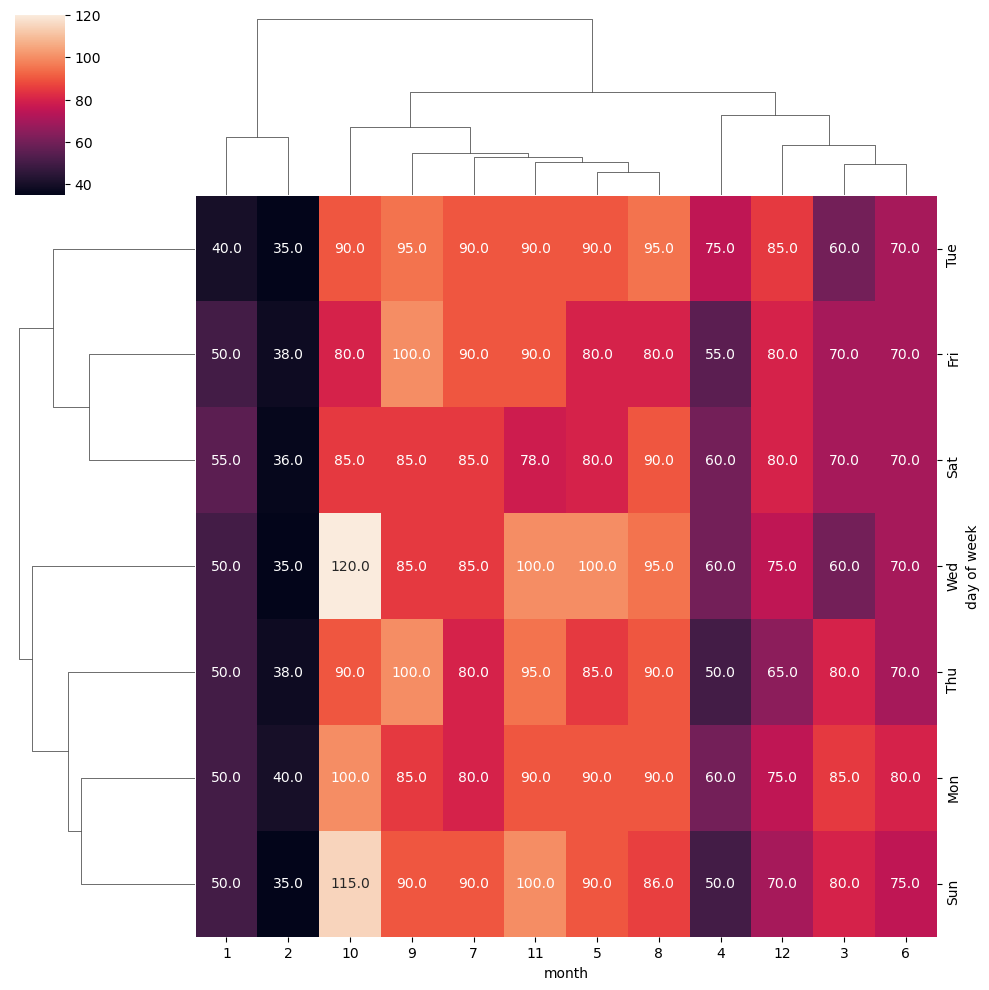

In [53]:
sns.clustermap(byDayMonth,annot=True, fmt = '0.1f')

Plot cluster map for Day Year

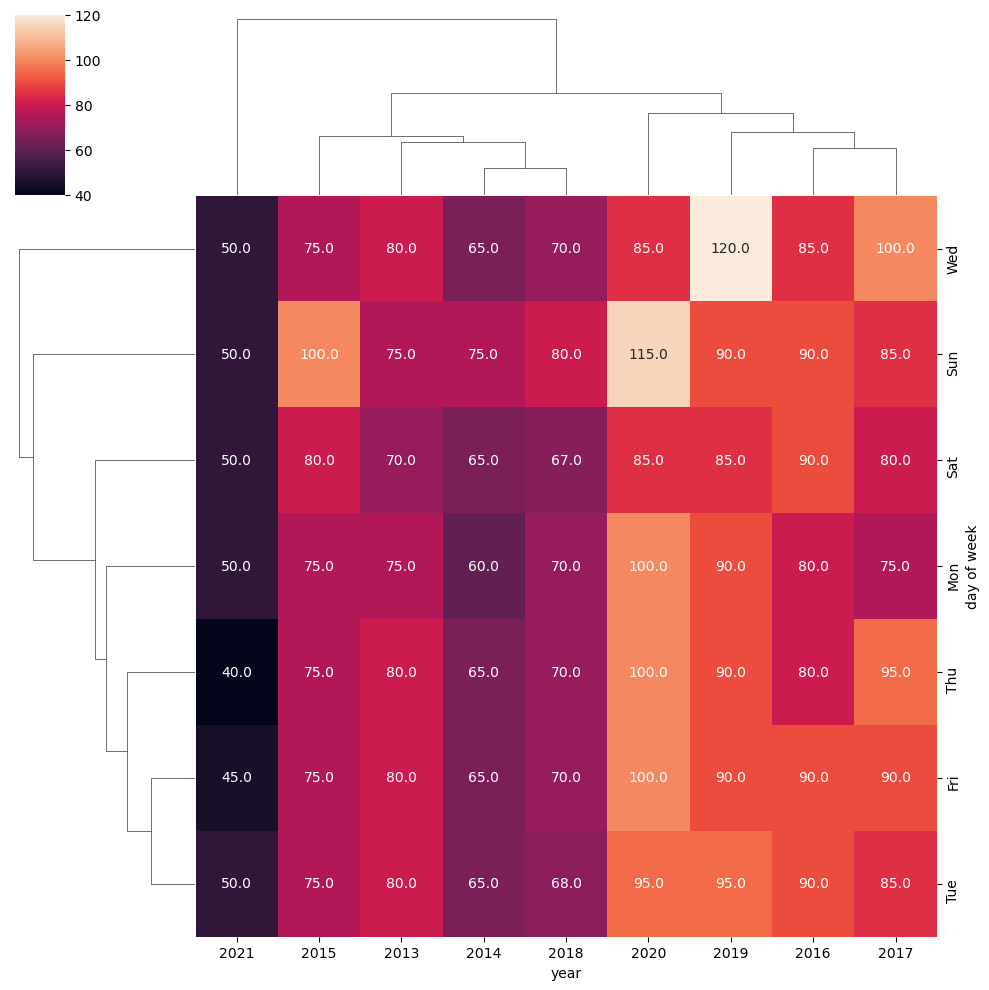

In [55]:
sns.clustermap(byDayYear,annot=True, fmt = '0.1f')

In [56]:
df[df['Maximum']==df['Maximum'].max()]

,Date,Unit,Minimum,Maximum,Average,Market,year,month,day,day of week
2199,2019-10-30,Kg,115,120,117.5,Tomato,2019,10,30,Wed


In [57]:
df[df['Minimum']==df['Minimum'].min()]

,Date,Unit,Minimum,Maximum,Average,Market,year,month,day,day of week
2659,2021-02-20,Kg,8,15,11.5,Tomato,2021,2,20,Sat
2660,2021-02-21,Kg,8,15,11.5,Tomato,2021,2,21,Sun
2668,2021-03-01,Kg,8,12,10.0,Tomato,2021,3,1,Mon


In [58]:
df[df['Average']==df['Average'].max()]

,Date,Unit,Minimum,Maximum,Average,Market,year,month,day,day of week
2199,2019-10-30,Kg,115,120,117.5,Tomato,2019,10,30,Wed


In [59]:
df[df['Average']==df['Average'].min()]

,Date,Unit,Minimum,Maximum,Average,Market,year,month,day,day of week
2668,2021-03-01,Kg,8,12,10.0,Tomato,2021,3,1,Mon


<Axes: xlabel='Maximum', ylabel='Count'>

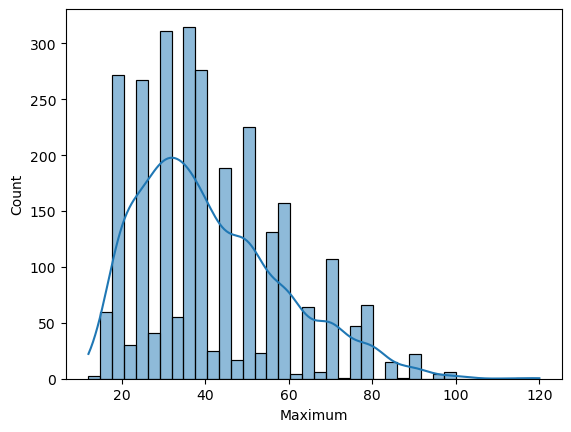

In [60]:
sns.histplot(x=df['Maximum'],kde=True,data=df)

<Axes: xlabel='Minimum', ylabel='Count'>

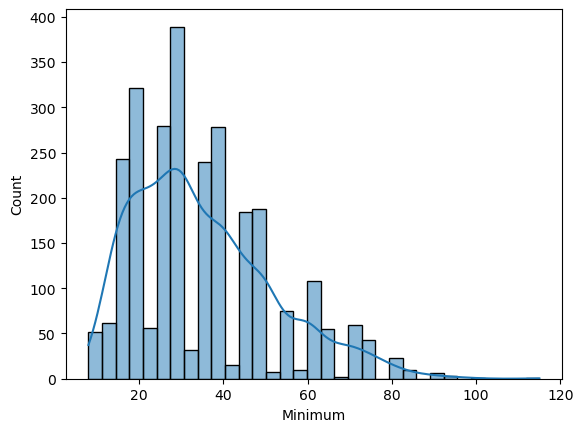

In [61]:
sns.histplot(x=df['Minimum'],kde=True,data=df)

<Axes: xlabel='Average', ylabel='Count'>

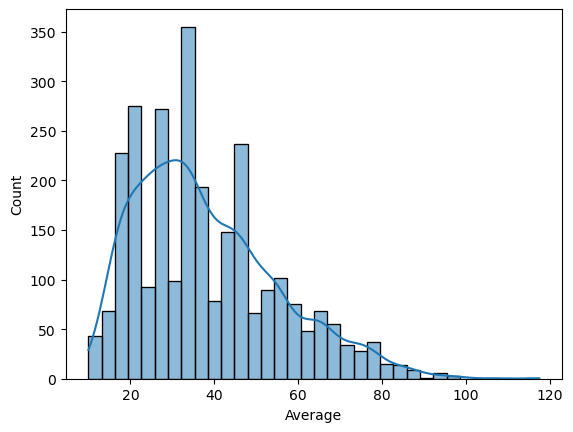

In [62]:
sns.histplot(x=df['Average'],kde=True,data=df)

<Axes: xlabel='day of week', ylabel='Maximum'>

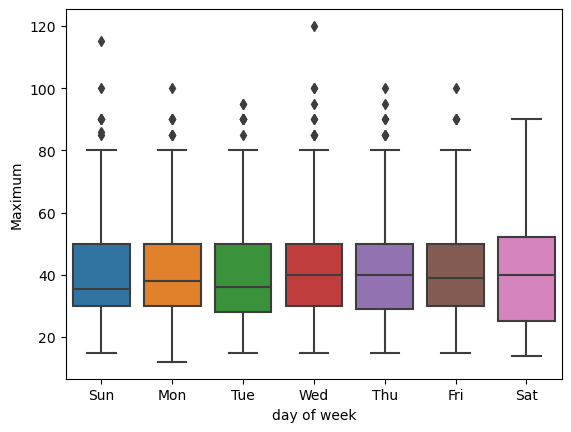

In [63]:
sns.boxplot(df,x='day of week',y='Maximum')

<Axes: xlabel='month', ylabel='Maximum'>

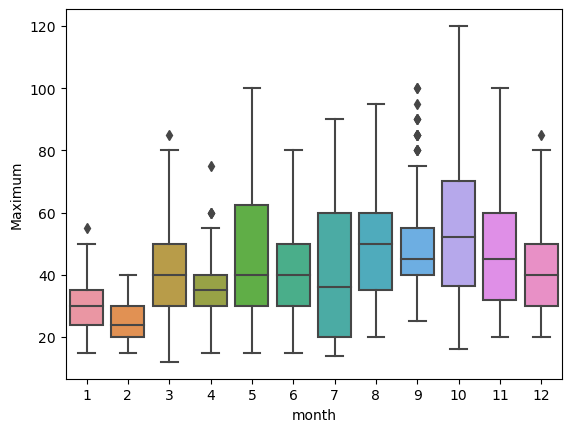

In [64]:
sns.boxplot(df,x='month',y='Maximum')

<Axes: xlabel='year', ylabel='Maximum'>

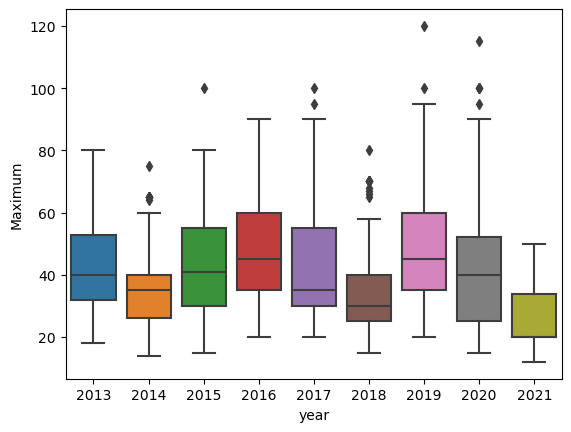

In [65]:
sns.boxplot(df,x='year',y='Maximum')

<Axes: xlabel='day of week', ylabel='Minimum'>

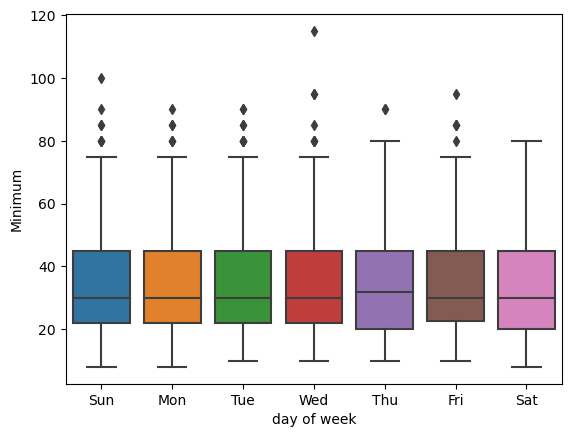

In [66]:
sns.boxplot(df,x='day of week',y='Minimum')


<Axes: xlabel='month', ylabel='Minimum'>

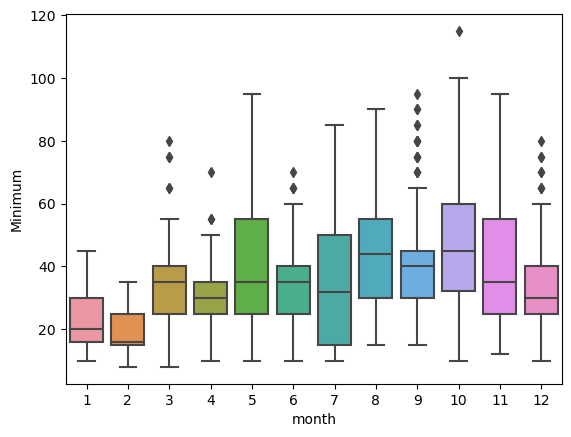

In [67]:
sns.boxplot(df,x='month',y='Minimum')


<Axes: xlabel='year', ylabel='Minimum'>

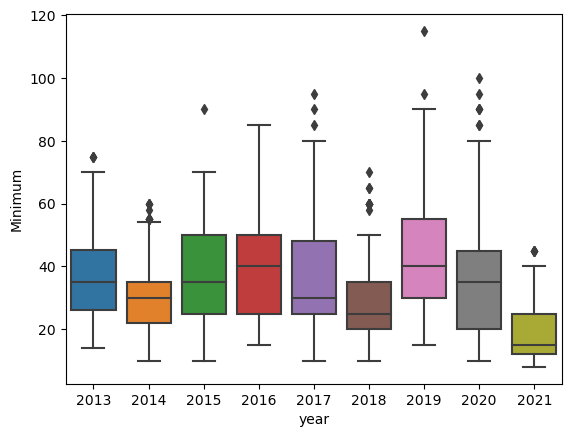

In [68]:
sns.boxplot(df,x='year',y='Minimum')

<Axes: xlabel='day of week', ylabel='Average'>

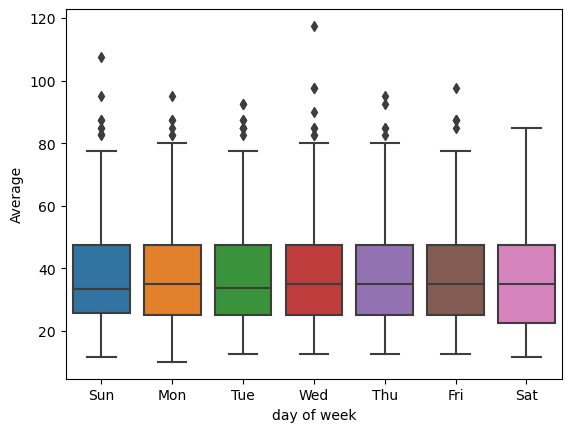

In [69]:
sns.boxplot(df,x='day of week',y='Average')

<Axes: xlabel='month', ylabel='Average'>

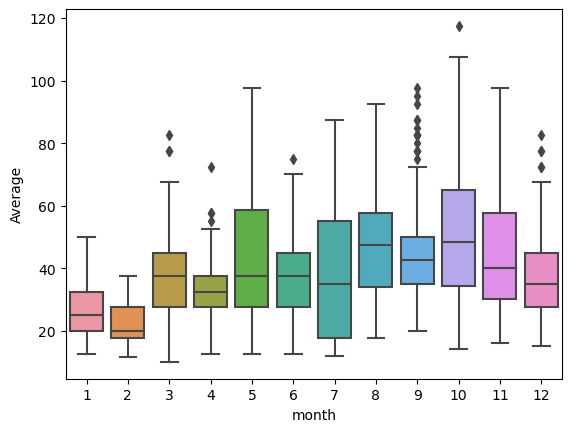

In [70]:
sns.boxplot(df,x='month',y='Average')

<Axes: xlabel='year', ylabel='Average'>

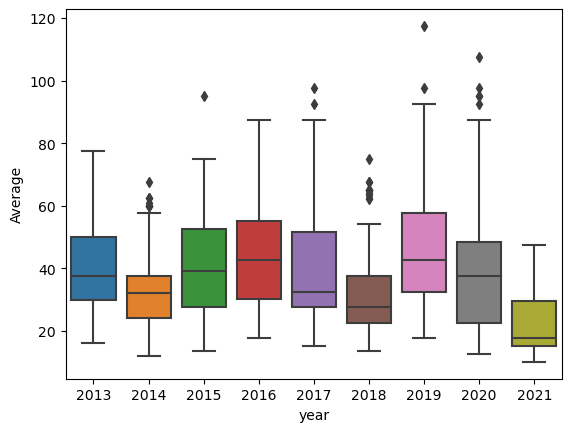

In [71]:
sns.boxplot(df,x='year',y='Average')

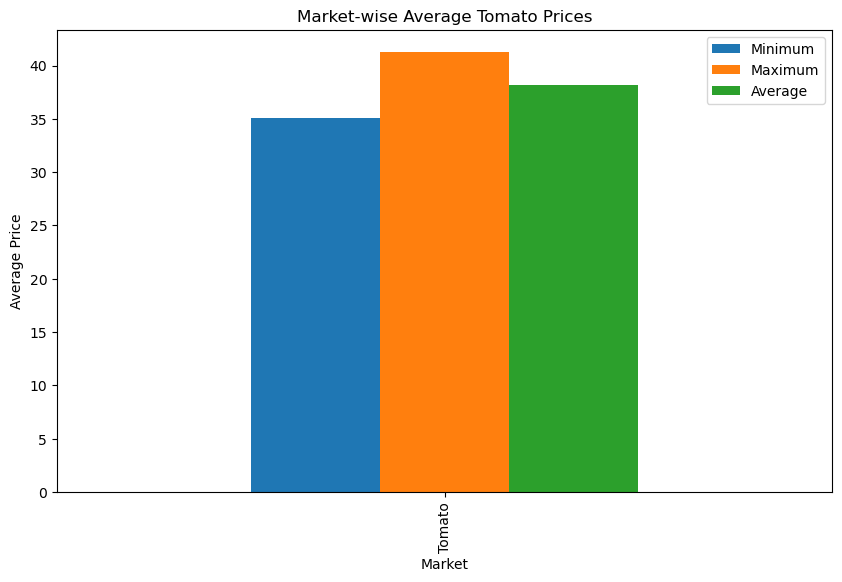

In [72]:
# Market-wise analysis
market_summary = df.groupby('Market').agg({'Minimum': 'mean', 'Maximum': 'mean', 'Average': 'mean'})

# Bar plot for market-wise average prices
market_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Market-wise Average Tomato Prices')
plt.ylabel('Average Price')
plt.show()

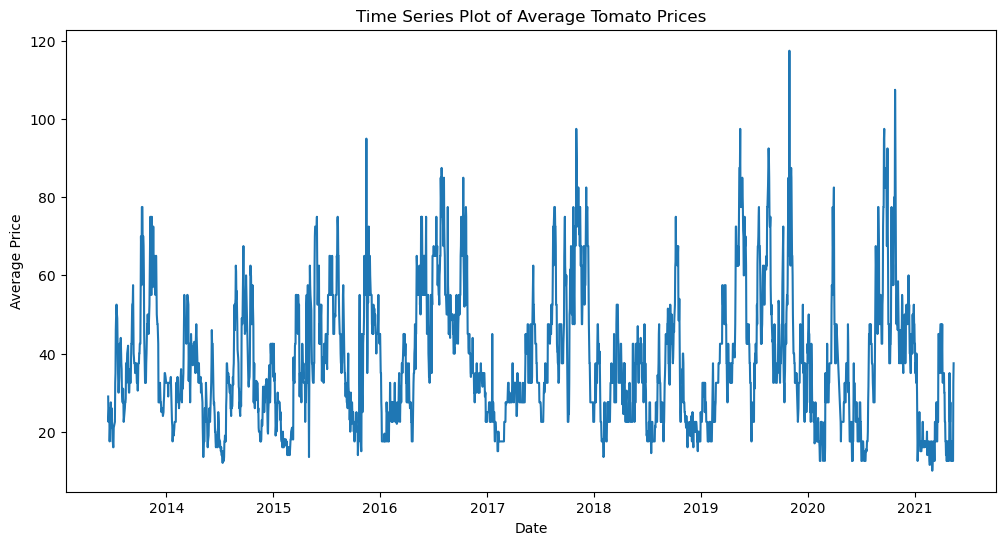

C:\Users\burha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\burha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\burha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


['arima_model.joblib']

In [73]:

from statsmodels.tsa.arima.model import ARIMA



# Read the dataset

df = pd.read_csv('Tomato.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Visualize the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Average'])
plt.title('Time Series Plot of Average Tomato Prices')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

# Define a function to fit the ARIMA model
def fit_arima_model(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# Fit the ARIMA model
arima_model = fit_arima_model(df['Average'], order=(1, 1, 1))

# Save the model using joblib
import joblib
joblib.dump(arima_model, 'arima_model.joblib')

In [74]:
# Define a function to fit the ARIMA model
def fit_arima_model(data, order=(1, 1, 1)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    return model_fit

# Fit the ARIMA model
arima_model = fit_arima_model(df['Average'], order=(1, 1, 1))

# Save the model using joblib
import joblib
joblib.dump(arima_model, 'modelTime.joblib')

C:\Users\burha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\burha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\burha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


['modelTime.joblib']